In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/CSUFTitan/Desktop/Jupyter/Sample datasets problem/Sample.csv")

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)
df

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
0,East,A,Brian,41,1,509.0,6.5
1,East,A,Brian,41,2,505.0,6.9
2,East,A,Brian,41,3,NaN,5.9
3,East,A,Brian,41,4,505.0,7.1
4,East,A,Brian,41,5,511.0,9.1
5,East,A,Brian,42,1,511.0,6.8
6,East,A,Brian,42,2,517.0,7.3
7,East,A,Brian,42,3,514.0,8.5
8,East,A,Brian,42,4,512.0,NaN
9,East,A,Brian,42,5,516.0,8.5


Since data in Service Time and Quality Score contains NaN value we need to drop it and clean the data.

In [12]:
df.isnull().sum().sum()

15

In [13]:
df[df["Service Time"].isnull()]

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
2,East,A,Brian,41,3,NaN,5.9
15,East,A,Brian,44,1,NaN,7.5
38,East,A,JORGE,20,4,NaN,7.4
59,East,B,George,48,5,NaN,7.7
90,North,A,John,4,2,NaN,7.7
121,North,B,Eric,29,2,NaN,4.3
169,South,A,Andrew,11,1,NaN,6.4
199,South,A,David,36,5,NaN,8.8
233,South,B,Michael,16,2,NaN,5.4


In [14]:
df[df["Quality Score"].isnull()]

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
8,East,A,Brian,42,4,512.0,NaN
69,East,B,Sarah,23,1,413.0,NaN
99,North,A,JOHNATHAN,3,5,452.0,NaN
159,North,B,SAMANTHA,8,5,446.0,NaN
222,South,B,Michael,13,3,519.0,NaN
238,South,B,MICHAEL,15,4,508.0,NaN


In [15]:
df = df.dropna()
df.reset_index(drop=True)

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
0,East,A,Brian,41,1,509.0,6.5
1,East,A,Brian,41,2,505.0,6.9
2,East,A,Brian,41,4,505.0,7.1
3,East,A,Brian,41,5,511.0,9.1
4,East,A,Brian,42,1,511.0,6.8
5,East,A,Brian,42,2,517.0,7.3
6,East,A,Brian,42,3,514.0,8.5
7,East,A,Brian,42,5,516.0,8.5
8,East,A,Brian,43,1,519.0,6.9
9,East,A,Brian,43,2,515.0,6.5


Column <b><i>Supervisor</i></b> contains uneven Names with all uppercase characters or some both lowercase and uppercase or misspell names incorrectly.


In [16]:
print(df['Supervisor'].unique())

['Brian' 'Jorge' 'JORGE' 'JORRGE' 'George' 'SARA' 'Sarah' 'SARAH' 'John'
 'JOHN' 'Kathy' 'Eric' 'Samantha' 'SAMANTHA' 'ADREEW' 'Andrew' 'ANDREW'
 'David' 'Julie' 'Michael' 'MICHAEL']


In [24]:
df['Supervisor'].str.upper().str.title() 
print(df['Supervisor'].unique())

['Brian' 'Jorge' 'Jorrge' 'George' 'Sara' 'Sarah' 'John' 'Kathy' 'Eric'
 'Samantha' 'Adreew' 'Andrew' 'David' 'Julie' 'Michael']


In [26]:
df.describe()

,Agent,Week,Service Time,Quality Score
count,225.000000,225.000000,225.000000,225.000000
mean,24.564444,2.991111,475.128889,6.899556
std,13.813379,1.411025,40.269919,1.218038
min,1.000000,1.000000,402.000000,4.300000
25%,13.000000,2.000000,451.000000,5.900000
50%,25.000000,3.000000,470.000000,6.900000
75%,36.000000,4.000000,511.000000,7.700000
max,48.000000,5.000000,550.000000,9.300000


Now will check correlation between columns

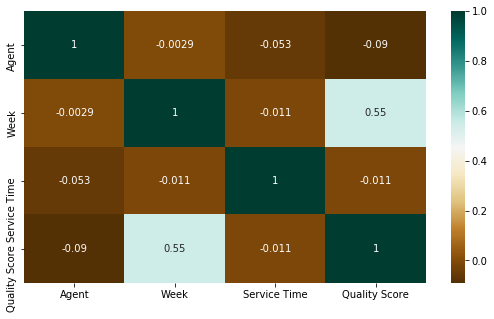

In [48]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),cmap="BrBG",annot=True)

We can see that columns Quality Score and Week correlation is greater than 0.5 i.e. it contains some relation between them.<br> Now we will perform pairplot in order to visualize data. 

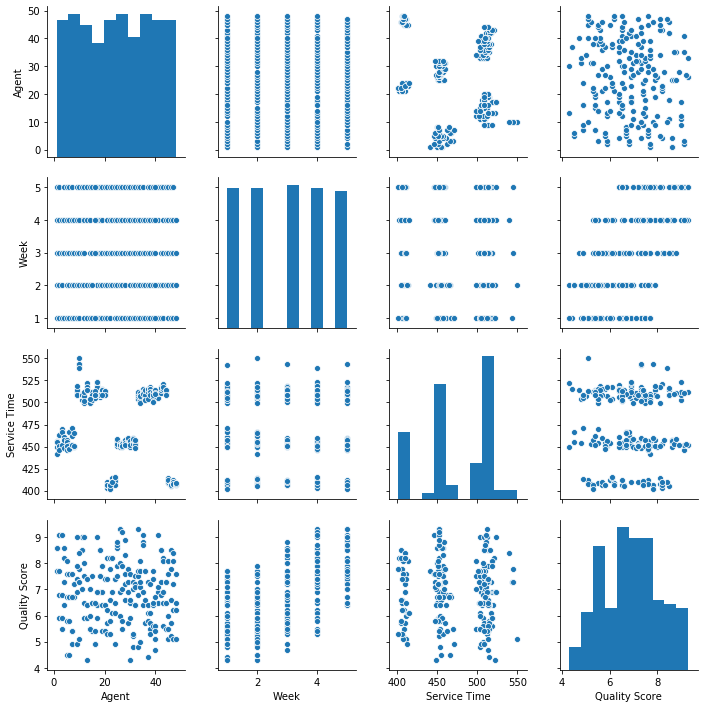

In [49]:
sns.pairplot(df)

Now checking any relationship between columns Service Time and Quality Score and found out that they have a interval gap of 20 seconds of Service Time

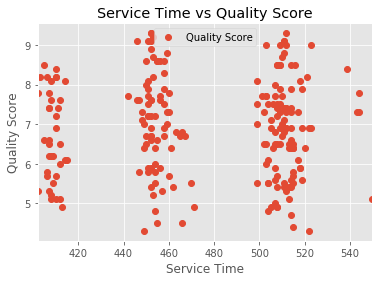

In [70]:
plt.style.use('ggplot')
df.plot(x='Service Time', y='Quality Score', style='o')  
plt.title('Service Time vs Quality Score')  
plt.xlabel('Service Time')  
plt.ylabel('Quality Score')  
plt.show()

As seen below, columns Agent and Service Time are grouped together in some parts.

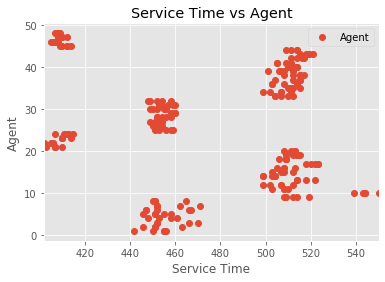

In [102]:
plt.style.use('ggplot')
df.plot(x='Service Time', y='Agent', style='o')  
plt.title('Service Time vs Agent')  
plt.xlabel('Service Time')  
plt.ylabel('Agent')  
plt.show()

Now will check relationship between above 2 columns and rest of the columns.
1. As seen below, we can see that the Service Time of 'East' site and both Clients 'A' & 'B' is getting decremented fast, as compared with other Sites - 'North' & 'South' which are having approximately same Service time.

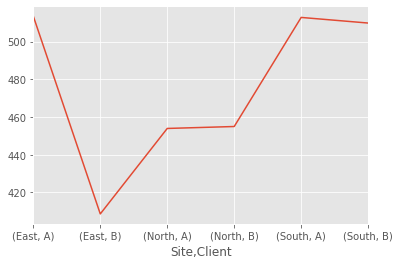

In [76]:
X=['A','B']
Y=['East','North','South']

df[(df['Client'].isin(X)) & (df['Site'].isin(Y))].groupby(['Site','Client'])['Service Time'].mean().plot()

   2. The quality score of Client 'B' of every site is getting decrease as compared to Client 'A' 

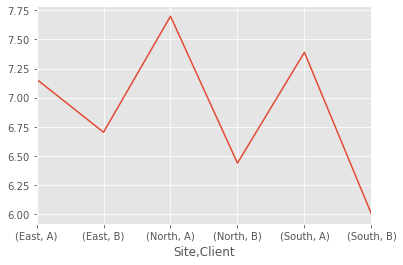

In [77]:
X=['A','B']
Y=['East','North','South']

df[(df['Client'].isin(X)) & (df['Site'].isin(Y))].groupby(['Site','Client'])['Quality Score'].mean().plot()

   3. As seen below, we are grouping each weeks with all Agents in order to analysis the quality score and found out that in the second week, quality score is getting decrease. So it can be assume that quality of work done by agent is not good as compared to other weeks which is increasing.

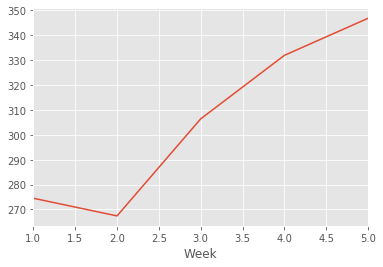

In [80]:
for i in range(1,48):
    X.append(i)
    
df[df['Agent'].isin(X)].groupby(['Week'])['Quality Score'].sum().plot()

In the above correlation matrix, we can see there is correlation of 0.55 between columns 'Week' and 'Quality Score'<br>Hence we will perform regression, classification on these columns.

In [89]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
%matplotlib inline

X = df['Quality Score'].values.reshape(-1,1)
y = df['Week'].values.reshape(-1,1)
# Accuracy of Decision Tree classifier on training set: 0.52

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train.ravel())

lab_enc_test = preprocessing.LabelEncoder()
testing_scores_encoded = lab_enc_test.fit_transform(y_test.ravel())

   1. Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()
linearreg.fit(X_train, training_scores_encoded.ravel())
print('Accuracy of Linear regression on training set: {:.2f}'
     .format(linearreg.score(X_train, training_scores_encoded)))
print('Accuracy of Linear regression on test set: {:.2f}'
     .format(linearreg.score(X_test, testing_scores_encoded)))

Accuracy of Linear regression on training set: 0.29
Accuracy of Linear regression on test set: 0.28


   2. Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, training_scores_encoded.ravel())
print('Accuracy of Logistic regression on training set: {:.2f}'
     .format(logreg.score(X_train, training_scores_encoded)))
print('Accuracy of Logistic regression on test set: {:.2f}'
     .format(logreg.score(X_test, testing_scores_encoded)))

Accuracy of Logistic regression on training set: 0.29
Accuracy of Logistic regression on test set: 0.27


   3. Decision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, training_scores_encoded)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, training_scores_encoded)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, testing_scores_encoded)))

Accuracy of Decision Tree classifier on training set: 0.52
Accuracy of Decision Tree classifier on test set: 0.27


   4. KNN Classifier

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, training_scores_encoded.ravel())
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, training_scores_encoded)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, testing_scores_encoded)))

Accuracy of K-NN classifier on training set: 0.46
Accuracy of K-NN classifier on test set: 0.33


   5. Linear Discriminant Analysis

In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, training_scores_encoded.ravel())
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, training_scores_encoded)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, testing_scores_encoded)))

Accuracy of LDA classifier on training set: 0.27
Accuracy of LDA classifier on test set: 0.29


   6. Gaussian NB

In [95]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, training_scores_encoded.ravel())
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, training_scores_encoded)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, testing_scores_encoded)))

Accuracy of GNB classifier on training set: 0.31
Accuracy of GNB classifier on test set: 0.38


   7. Support Vecotor Machine

In [96]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, training_scores_encoded.ravel())
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, training_scores_encoded)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, testing_scores_encoded)))

Accuracy of SVM classifier on training set: 0.31
Accuracy of SVM classifier on test set: 0.24


As we can see above, accuracy of Decision Tree classifier is high compared to other, so there might be relation between Week and Quality score. 